In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [3]:
trees = gpd.read_file('Trees.geojson')

In [4]:
display(trees)

,OBJECTID,PrimaryKey,LocationOrTagNo,Ward,Site,LatinName,CommonName,Owner,NTRef,Height,Spread,AgeGroup,DiameterAtBreastHeight,Easting,Northing,geometry
0,1,Grp/1 (845800),,Inverleith\n,"Raeburn Mews, Edinburgh",,,,NT06-9001-0993,,,Over-Mature,,309001,660993,POINT (-3.45441 55.83355)
1,2,Sgl/358 (813204),2-205-16,Fountainbridge/Craiglockhart\n,Craiglockhart Woods,,,Culture and Leisure,NT06-9010-1010,5 to 10 meters,6 to 9 meters,Juvenile,10 - 20,309010,661010,POINT (-3.45428 55.83371)
2,3,Sgl/18 (046468),b05936,Drum Brae/Gyle\n,"Rannoch Road, Edinburgh",Acer pseudoplatanus,Sycamore,,NT17-0000-4261,15 to 20 meters,Over 12 meters,Mature,90 +,310000,674261,POINT (-3.44289 55.95291)
3,4,Sgl/1274 (071816),g00495,Almond\n,Davidson's Main's Park,Acer pseudoplatanus,Sycamore,Culture and Leisure,NT17-0000-5419,20 to 25 meters,Over 12 meters,Mature,90 +,310000,675419,POINT (-3.44328 55.96331)
4,5,Sgl/82 (193348),w765,Almond\n,Royal High School,Acer pseudoplatanus,Sycamore,Children and Families,NT17-0000-5184,15 to 20 meters,9 to 12 meters,Mature,50 - 60,310000,675184,POINT (-3.44320 55.96120)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50395,50396,Sgl/202 (399608),Brunstane walk3,Portobello/Craigmillar\n,"Milton Road East, Edinburgh",Acer pseudoplatanus,Sycamore,,NT37-2711-3050,5 to 10 meters,3 to 6 meters,Middle Aged,10 - 20,332711,673050,POINT (-3.07897 55.94575)
50396,50397,Sgl/201 (399604),Brunstane walk2,Portobello/Craigmillar\n,"Milton Road East, Edinburgh",Acer pseudoplatanus,Sycamore,,NT37-2713-3052,10 to 15 meters,6 to 9 meters,Middle Aged,20 - 30,332713,673052,POINT (-3.07894 55.94577)
50397,50398,Sgl/200 (399600),Brunstane walk1,Portobello/Craigmillar\n,"Milton Road East, Edinburgh",Fraxinus excelsior,Common Ash,,NT37-2713-3056,10 to 15 meters,6 to 9 meters,Middle Aged,30 - 40,332713,673056,POINT (-3.07894 55.94581)
50398,50399,Sgl/2 (209604),T1,None,"Milton Road East, Edinburgh",Acer pseudoplatanus,Sycamore,Services For Communities,NT37-2715-3062,5 to 10 meters,3 to 6 meters,Semi-mature,10 - 20,332715,673062,POINT (-3.07891 55.94586)


In [5]:
# Remove species with count less than 2000
value_counts = trees['CommonName'].value_counts()
to_remove = value_counts[value_counts <= 2000].index
species = trees[~trees.CommonName.isin(to_remove)]
display(species)

,OBJECTID,PrimaryKey,LocationOrTagNo,Ward,Site,LatinName,CommonName,Owner,NTRef,Height,Spread,AgeGroup,DiameterAtBreastHeight,Easting,Northing,geometry
2,3,Sgl/18 (046468),b05936,Drum Brae/Gyle\n,"Rannoch Road, Edinburgh",Acer pseudoplatanus,Sycamore,,NT17-0000-4261,15 to 20 meters,Over 12 meters,Mature,90 +,310000,674261,POINT (-3.44289 55.95291)
3,4,Sgl/1274 (071816),g00495,Almond\n,Davidson's Main's Park,Acer pseudoplatanus,Sycamore,Culture and Leisure,NT17-0000-5419,20 to 25 meters,Over 12 meters,Mature,90 +,310000,675419,POINT (-3.44328 55.96331)
4,5,Sgl/82 (193348),w765,Almond\n,Royal High School,Acer pseudoplatanus,Sycamore,Children and Families,NT17-0000-5184,15 to 20 meters,9 to 12 meters,Mature,50 - 60,310000,675184,POINT (-3.44320 55.96120)
32,33,Sgl/5 (802016),Linn Mill,Almond\n,"Linnmill, South Queensferry",Prunus spp.,Cherry spp,,NT17-1245-8474,Up to 5 meters,6 to 9 meters,Mature,30 - 40,311245,678474,POINT (-3.42435 55.99098)
37,38,Sgl/1 (125200),b14361,Almond\n,"Society Road, South Queensferry",Fraxinus excelsior,Common Ash,,NT17-1604-8665,10 to 15 meters,6 to 9 meters,Semi-mature,20 - 30,311604,678665,POINT (-3.41866 55.99277)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50394,50395,Sgl/203 (399612),Brunstane walk4,Portobello/Craigmillar\n,"Milton Road East, Edinburgh",Acer pseudoplatanus,Sycamore,,NT37-2710-3048,5 to 10 meters,3 to 6 meters,Middle Aged,10 - 20,332710,673048,POINT (-3.07898 55.94574)
50395,50396,Sgl/202 (399608),Brunstane walk3,Portobello/Craigmillar\n,"Milton Road East, Edinburgh",Acer pseudoplatanus,Sycamore,,NT37-2711-3050,5 to 10 meters,3 to 6 meters,Middle Aged,10 - 20,332711,673050,POINT (-3.07897 55.94575)
50396,50397,Sgl/201 (399604),Brunstane walk2,Portobello/Craigmillar\n,"Milton Road East, Edinburgh",Acer pseudoplatanus,Sycamore,,NT37-2713-3052,10 to 15 meters,6 to 9 meters,Middle Aged,20 - 30,332713,673052,POINT (-3.07894 55.94577)
50397,50398,Sgl/200 (399600),Brunstane walk1,Portobello/Craigmillar\n,"Milton Road East, Edinburgh",Fraxinus excelsior,Common Ash,,NT37-2713-3056,10 to 15 meters,6 to 9 meters,Middle Aged,30 - 40,332713,673056,POINT (-3.07894 55.94581)


In [6]:
species.to_file("Species.geojson")

/home/matin/miniconda3/envs/deepforest/lib/python3.10/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


In [7]:
districts = gpd.read_file("./edi_districts/districts_1902_4326.shp")

In [8]:
display(districts)

,UN,NAME,AREA,LON,LAT,BTYPEID,START,END,geometry
0,1190303,Canongate,0,-3.164882,55.950446,1,1903,1912,"POLYGON ((-3.16387 55.96071, -3.16210 55.96032..."
1,1190306,Morningside,0,-3.212544,55.929728,1,1903,1912,"POLYGON ((-3.22724 55.93577, -3.22416 55.93393..."
2,1190305,Newington,0,-3.174587,55.933174,1,1903,1912,"POLYGON ((-3.16525 55.93932, -3.16450 55.93881..."
3,1190302,St. Andrew's,0,-3.194413,55.959822,1,1903,1912,"POLYGON ((-3.18741 55.97152, -3.18686 55.97045..."
4,1190301,St. George's,0,-3.221546,55.958320,1,1903,1912,"POLYGON ((-3.21743 55.98490, -3.21764 55.98317..."
5,1190304,St. Giles,0,-3.193396,55.946212,1,1903,1912,"POLYGON ((-3.18247 55.94883, -3.18234 55.94875..."
6,1190307,Portobello,0,-3.123949,55.951886,1,1903,1912,"POLYGON ((-3.09239 55.95013, -3.09134 55.94988..."


<AxesSubplot:>

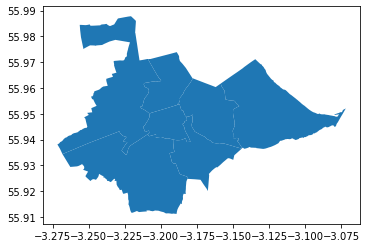

In [9]:
districts.plot()

In [10]:
wards = gpd.read_file("Edinburgh_Ward_Boundaries.geojson")

(-3.35, -3.05)

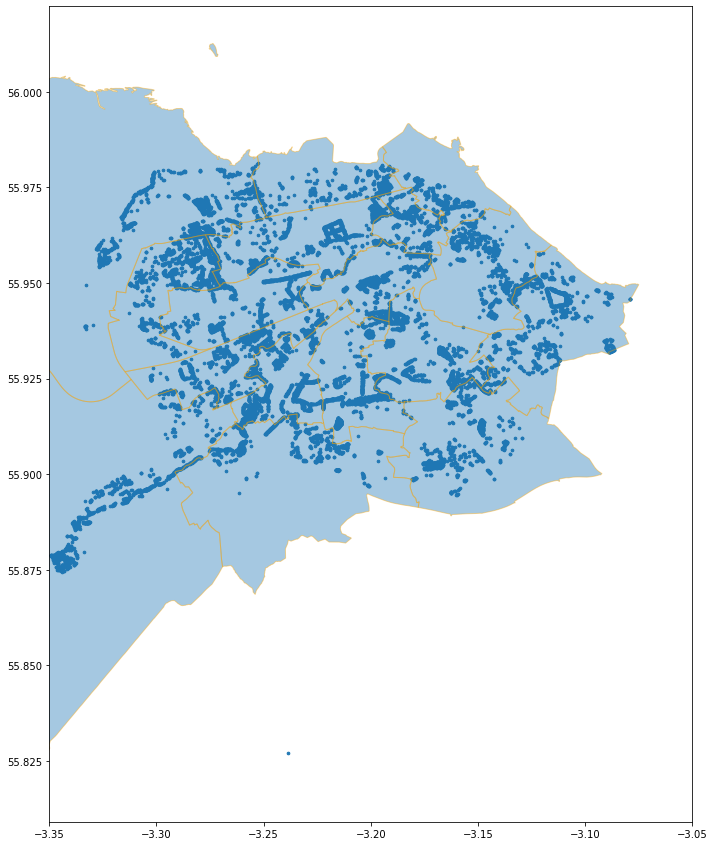

In [43]:
f, ax = plt.subplots(1, figsize=(15, 15))
ax = species.plot(markersize=7, ax=ax)
ax = wards.plot(edgecolor='orange', alpha=0.4, ax=ax)
ax.set_xlim(-3.35, -3.05)
# ax.set_ylim(55.9,55.99)
# _ = ax.axis('off')

In [11]:
wards

,OBJECTID,Ward_Name,Link,Review,Ward_No,Date,Ward_Code,geometry
0,1,Almond,https://democracy.edinburgh.gov.uk/mgMemberInd...,Fifth Statutory Review of Electoral Arrangemen...,1,September 2016,S13002919,"MULTIPOLYGON (((-3.34261 56.00385, -3.34243 56..."
1,2,Pentland Hills,https://democracy.edinburgh.gov.uk/mgMemberInd...,Fifth Statutory Review of Electoral Arrangemen...,2,September 2016,S13002920,"POLYGON ((-3.34951 55.92681, -3.34952 55.92681..."
2,3,Drum Brae / Gyle,https://democracy.edinburgh.gov.uk/mgMemberInd...,Fifth Statutory Review of Electoral Arrangemen...,3,September 2016,S13002921,"POLYGON ((-3.31947 55.94284, -3.32000 55.94282..."
3,4,Forth,https://democracy.edinburgh.gov.uk/mgMemberInd...,Fifth Statutory Review of Electoral Arrangemen...,4,September 2016,S13002922,"POLYGON ((-3.21741 55.98578, -3.21741 55.98600..."
4,5,Inverleith,https://democracy.edinburgh.gov.uk/mgMemberInd...,Fifth Statutory Review of Electoral Arrangemen...,5,September 2016,S13002923,"POLYGON ((-3.19458 55.97134, -3.19462 55.97137..."
5,6,Corstorphine / Murrayfield,https://democracy.edinburgh.gov.uk/mgMemberInd...,Fifth Statutory Review of Electoral Arrangemen...,6,September 2016,S13002924,"POLYGON ((-3.24757 55.95663, -3.24763 55.95663..."
6,7,Sighthill / Gorgie,https://democracy.edinburgh.gov.uk/mgMemberInd...,Fifth Statutory Review of Electoral Arrangemen...,7,September 2016,S13002925,"POLYGON ((-3.21695 55.94556, -3.21697 55.94553..."
7,8,Colinton / Fairmilehead,https://democracy.edinburgh.gov.uk/mgMemberInd...,Fifth Statutory Review of Electoral Arrangemen...,8,September 2016,S13002926,"POLYGON ((-3.23438 55.91571, -3.23438 55.91574..."
8,9,Fountainbridge / Craiglockhart,https://democracy.edinburgh.gov.uk/mgMemberInd...,Fifth Statutory Review of Electoral Arrangemen...,9,September 2016,S13002927,"POLYGON ((-3.20991 55.94461, -3.20995 55.94467..."
9,10,Morningside,https://democracy.edinburgh.gov.uk/mgMemberInd...,Fifth Statutory Review of Electoral Arrangemen...,10,September 2016,S13002928,"POLYGON ((-3.22095 55.91170, -3.22085 55.91168..."


In [12]:
# Remove Pentlands and Almond
wards_ex = wards.iloc[2:]
wards_ex

,OBJECTID,Ward_Name,Link,Review,Ward_No,Date,Ward_Code,geometry
2,3,Drum Brae / Gyle,https://democracy.edinburgh.gov.uk/mgMemberInd...,Fifth Statutory Review of Electoral Arrangemen...,3,September 2016,S13002921,"POLYGON ((-3.31947 55.94284, -3.32000 55.94282..."
3,4,Forth,https://democracy.edinburgh.gov.uk/mgMemberInd...,Fifth Statutory Review of Electoral Arrangemen...,4,September 2016,S13002922,"POLYGON ((-3.21741 55.98578, -3.21741 55.98600..."
4,5,Inverleith,https://democracy.edinburgh.gov.uk/mgMemberInd...,Fifth Statutory Review of Electoral Arrangemen...,5,September 2016,S13002923,"POLYGON ((-3.19458 55.97134, -3.19462 55.97137..."
5,6,Corstorphine / Murrayfield,https://democracy.edinburgh.gov.uk/mgMemberInd...,Fifth Statutory Review of Electoral Arrangemen...,6,September 2016,S13002924,"POLYGON ((-3.24757 55.95663, -3.24763 55.95663..."
6,7,Sighthill / Gorgie,https://democracy.edinburgh.gov.uk/mgMemberInd...,Fifth Statutory Review of Electoral Arrangemen...,7,September 2016,S13002925,"POLYGON ((-3.21695 55.94556, -3.21697 55.94553..."
7,8,Colinton / Fairmilehead,https://democracy.edinburgh.gov.uk/mgMemberInd...,Fifth Statutory Review of Electoral Arrangemen...,8,September 2016,S13002926,"POLYGON ((-3.23438 55.91571, -3.23438 55.91574..."
8,9,Fountainbridge / Craiglockhart,https://democracy.edinburgh.gov.uk/mgMemberInd...,Fifth Statutory Review of Electoral Arrangemen...,9,September 2016,S13002927,"POLYGON ((-3.20991 55.94461, -3.20995 55.94467..."
9,10,Morningside,https://democracy.edinburgh.gov.uk/mgMemberInd...,Fifth Statutory Review of Electoral Arrangemen...,10,September 2016,S13002928,"POLYGON ((-3.22095 55.91170, -3.22085 55.91168..."
10,11,City Centre,https://democracy.edinburgh.gov.uk/mgMemberInd...,Fifth Statutory Review of Electoral Arrangemen...,11,September 2016,S13002929,"POLYGON ((-3.20081 55.94107, -3.20064 55.94106..."
11,12,Leith Walk,https://democracy.edinburgh.gov.uk/mgMemberInd...,Fifth Statutory Review of Electoral Arrangemen...,12,September 2016,S13002930,"POLYGON ((-3.17964 55.97295, -3.17971 55.97302..."


In [13]:
# Keep species in wards_ex
species_ex = gpd.overlay(species, wards_ex, how='intersection')

In [14]:
species_ex

,OBJECTID_1,PrimaryKey,LocationOrTagNo,Ward,Site,LatinName,CommonName,Owner,NTRef,Height,...,Easting,Northing,OBJECTID_2,Ward_Name,Link,Review,Ward_No,Date,Ward_Code,geometry
0,4072,Sgl/3 (767408),South Maybury,Drum Brae/Gyle\n,"South Maybury, Edinburgh",Acer platanoides,Norway Maple,,NT17-8090-2903,Up to 5 meters,...,318090,672903,3,Drum Brae / Gyle,https://democracy.edinburgh.gov.uk/mgMemberInd...,Fifth Statutory Review of Electoral Arrangemen...,3,September 2016,S13002921,POINT (-3.31296 55.94216)
1,4101,Sgl/22 (766600),NOAL Maybury Drive,Drum Brae/Gyle\n,"Maybury Drive, Edinburgh",Acer pseudoplatanus,Sycamore,,NT17-8123-3744,5 to 10 meters,...,318123,673744,3,Drum Brae / Gyle,https://democracy.edinburgh.gov.uk/mgMemberInd...,Fifth Statutory Review of Electoral Arrangemen...,3,September 2016,S13002921,POINT (-3.31269 55.94972)
2,4123,Sgl/5 (371416),Almond Green,Drum Brae/Gyle\n,"Almond Green, Edinburgh",Prunus spp.,Cherry spp,,NT17-8147-3726,5 to 10 meters,...,318147,673726,3,Drum Brae / Gyle,https://democracy.edinburgh.gov.uk/mgMemberInd...,Fifth Statutory Review of Electoral Arrangemen...,3,September 2016,S13002921,POINT (-3.31230 55.94956)
3,4129,Sgl/1 (371400),Almond Green,Drum Brae/Gyle\n,"Almond Green, Edinburgh",Prunus spp.,Cherry spp,,NT17-8152-3762,5 to 10 meters,...,318152,673762,3,Drum Brae / Gyle,https://democracy.edinburgh.gov.uk/mgMemberInd...,Fifth Statutory Review of Electoral Arrangemen...,3,September 2016,S13002921,POINT (-3.31223 55.94989)
4,4133,Sgl/3 (371408),Almond Green,Drum Brae/Gyle\n,"Almond Green, Edinburgh",Acer platanoides,Norway Maple,,NT17-8156-3780,5 to 10 meters,...,318156,673780,3,Drum Brae / Gyle,https://democracy.edinburgh.gov.uk/mgMemberInd...,Fifth Statutory Review of Electoral Arrangemen...,3,September 2016,S13002921,POINT (-3.31217 55.95005)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19267,50395,Sgl/203 (399612),Brunstane walk4,Portobello/Craigmillar\n,"Milton Road East, Edinburgh",Acer pseudoplatanus,Sycamore,,NT37-2710-3048,5 to 10 meters,...,332710,673048,17,Portobello / Craigmillar,https://democracy.edinburgh.gov.uk/mgMemberInd...,Fifth Statutory Review of Electoral Arrangemen...,17,September 2016,S13002935,POINT (-3.07898 55.94574)
19268,50396,Sgl/202 (399608),Brunstane walk3,Portobello/Craigmillar\n,"Milton Road East, Edinburgh",Acer pseudoplatanus,Sycamore,,NT37-2711-3050,5 to 10 meters,...,332711,673050,17,Portobello / Craigmillar,https://democracy.edinburgh.gov.uk/mgMemberInd...,Fifth Statutory Review of Electoral Arrangemen...,17,September 2016,S13002935,POINT (-3.07897 55.94575)
19269,50397,Sgl/201 (399604),Brunstane walk2,Portobello/Craigmillar\n,"Milton Road East, Edinburgh",Acer pseudoplatanus,Sycamore,,NT37-2713-3052,10 to 15 meters,...,332713,673052,17,Portobello / Craigmillar,https://democracy.edinburgh.gov.uk/mgMemberInd...,Fifth Statutory Review of Electoral Arrangemen...,17,September 2016,S13002935,POINT (-3.07894 55.94577)
19270,50398,Sgl/200 (399600),Brunstane walk1,Portobello/Craigmillar\n,"Milton Road East, Edinburgh",Fraxinus excelsior,Common Ash,,NT37-2713-3056,10 to 15 meters,...,332713,673056,17,Portobello / Craigmillar,https://democracy.edinburgh.gov.uk/mgMemberInd...,Fifth Statutory Review of Electoral Arrangemen...,17,September 2016,S13002935,POINT (-3.07894 55.94581)


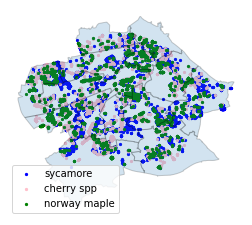

In [34]:
f, ax = plt.subplots(1, figsize=(3.6, 3.6))
sycamore_plot = species_ex[species_ex['CommonName']=='Sycamore'].plot(color = 'blue', markersize=5, ax=ax, label='sycamore')
cherry_plot = species_ex[species_ex['CommonName']=='Cherry spp'].plot(color = 'pink', markersize=5, ax=ax, label='cherry spp')
maple_plot = species_ex[species_ex['CommonName']=='Norway Maple'].plot(color = 'green', markersize=5, ax=ax, label='norway maple')
wards_plot = wards_ex.plot(edgecolor='black', alpha=0.2, ax=ax)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
_ = ax.axis('off')
plt.tight_layout()